In [88]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df = pd.read_csv('kc_house_data.csv\kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [90]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [93]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
df = df.drop('date',axis=1)

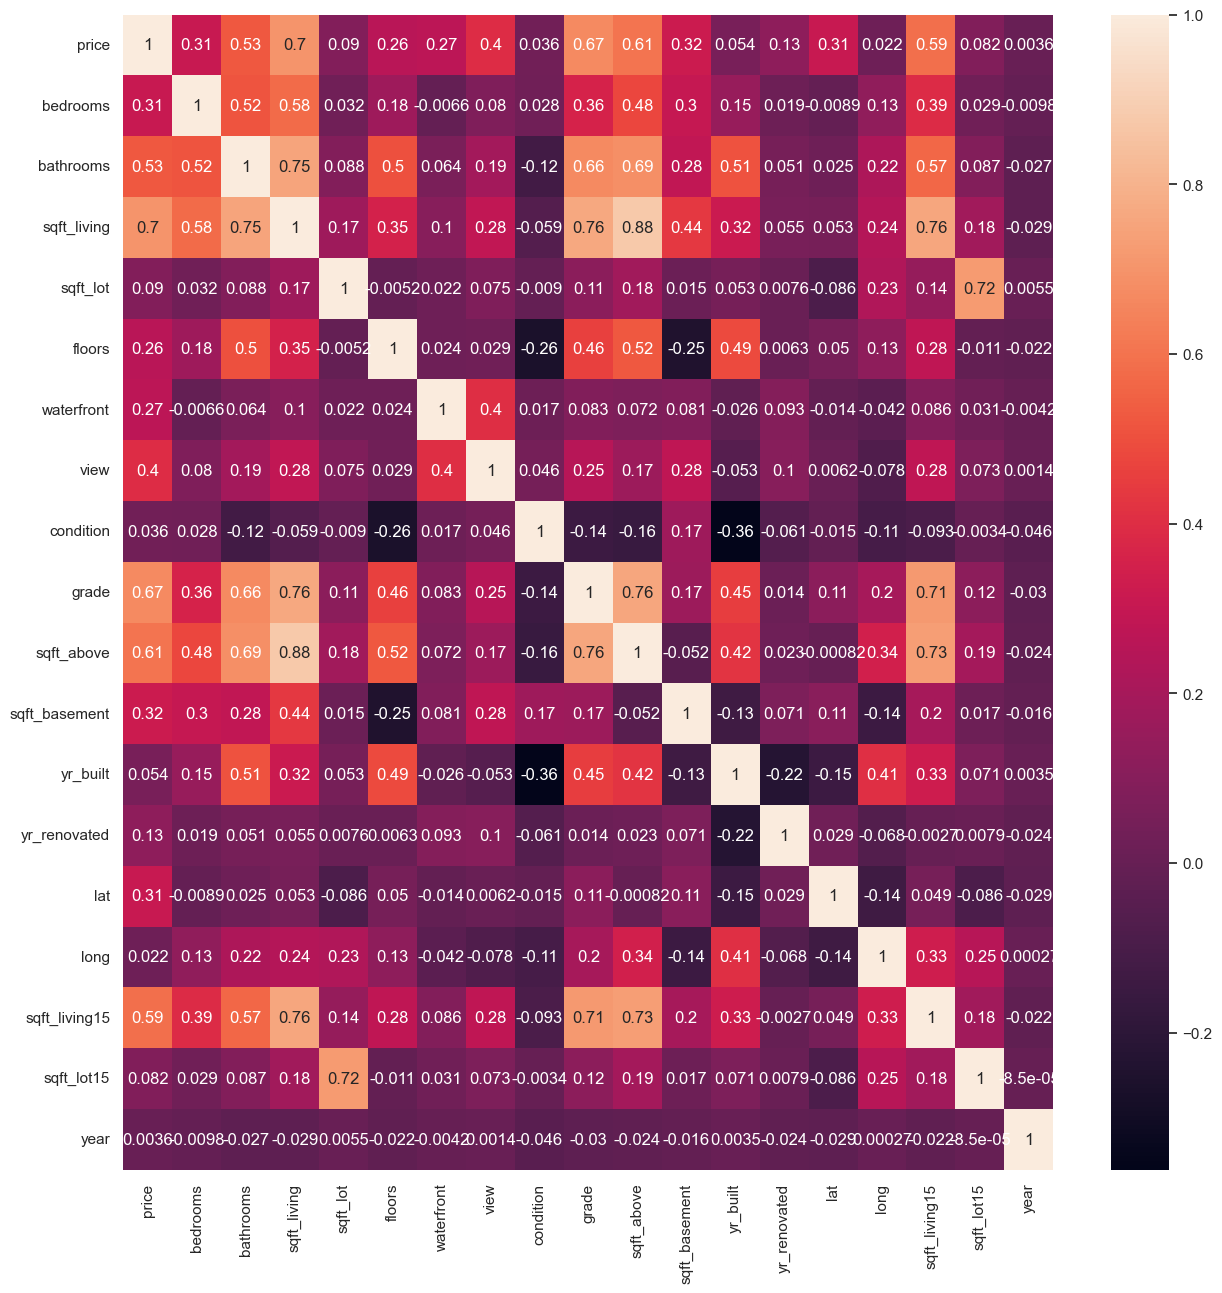

In [122]:
import seaborn as sns

X_corr = df.drop(["price"], axis=1)
Y_corr = df["price"]


corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [95]:
price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [96]:
dropped_coloums = ['id', 'zipcode', 'month']
for i in dropped_coloums:
  df.drop([i], axis=1, inplace = True)

In [97]:
df.reset_index(drop=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015


In [98]:
X = df.drop(["price"], axis=1)
Y = df["price"]

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.35,random_state=0)

In [100]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14048, 18)
(7565, 18)
(14048,)
(7565,)


In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Deep learning model

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime



In [103]:
model = Sequential()

model.add(Dense(152, kernel_initializer='he_uniform', activation='relu', input_dim=18))
model.add(Dense(76, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(38, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(19, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='glorot_uniform', activation='linear'))

In [104]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 152)               2888      
                                                                 
 dense_34 (Dense)            (None, 76)                11628     
                                                                 
 dropout_10 (Dropout)        (None, 76)                0         
                                                                 
 dense_35 (Dense)            (None, 38)                2926      
                                                                 
 dense_36 (Dense)            (None, 19)                741       
                                                                 
 dropout_11 (Dropout)        (None, 19)                0         
                                                                 
 dense_37 (Dense)            (None, 1)                

In [105]:
# model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.compile(optimizer='adam',loss='mean_squared_error')

In [106]:
start = datetime.now()
h = model.fit(x_train, 
              y_train.values, 
              epochs=200, 
              batch_size=128, 
              validation_data=(x_test,y_test.values),
              shuffle=True,
              verbose=1)
print("Training completed in time: ", datetime.now() - start)

# model.fit(x=X_train,y=y_train.values, epochs=500, validation_data=(X_test,y_test.values), batch_size=16, shuffle=True,verbose=1)

Epoch 1/200
110/110 [==============================] - 5s 6ms/step - loss: 420745510912.0000 - val_loss: 433468112896.0000
Epoch 2/200
110/110 [==============================] - 0s 4ms/step - loss: 381280321536.0000 - val_loss: 303686844416.0000
Epoch 3/200
110/110 [==============================] - 0s 3ms/step - loss: 180868874240.0000 - val_loss: 112150478848.0000
Epoch 4/200
110/110 [==============================] - 0s 3ms/step - loss: 135320633344.0000 - val_loss: 109939277824.0000
Epoch 5/200
110/110 [==============================] - 0s 3ms/step - loss: 133340389376.0000 - val_loss: 105222299648.0000
Epoch 6/200
110/110 [==============================] - 0s 3ms/step - loss: 127734046720.0000 - val_loss: 100627447808.0000
Epoch 7/200
110/110 [==============================] - 0s 4ms/step - loss: 126050574336.0000 - val_loss: 94753873920.0000
Epoch 8/200
110/110 [==============================] - 0s 4ms/step - loss: 123033952256.0000 - val_loss: 92470140928.0000
Epoch 9/200
110/11

In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict(x_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

237/237 [==============================] - 0s 813us/step
MAE:  115835.62250805518
MSE:  39707956175.41171
RMSE:  199268.5529013841
Variance Regression Score:  0.7604420680888538


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


In [114]:
variance_explained = explained_variance_score(y_test, predictions)
print('Variance Regression Score: {:.2%}'.format(variance_explained))


Variance Regression Score: 76.04%


C:\Users\shiva\AppData\Local\Temp\ipykernel_8536\4035770271.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


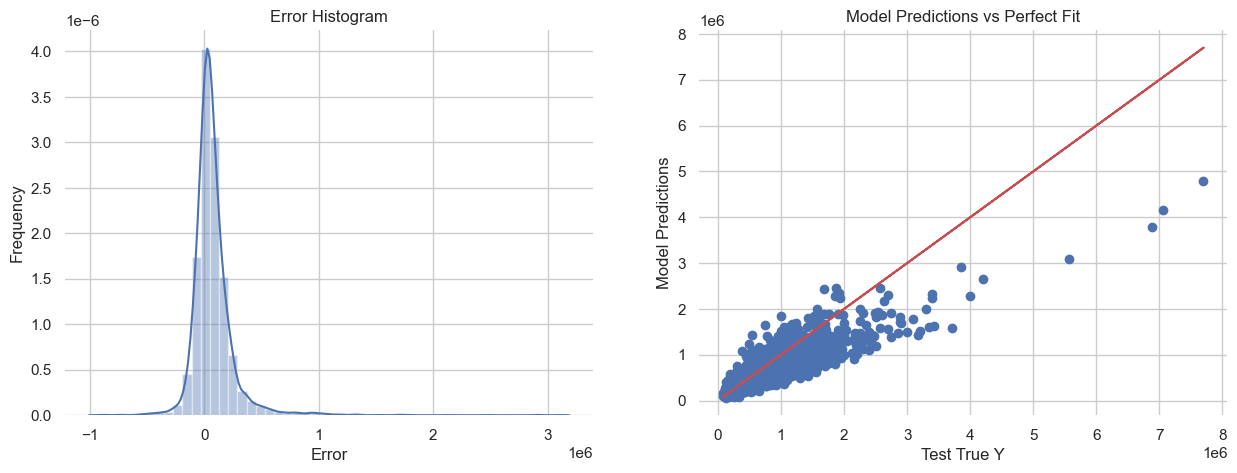

In [115]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot of actual vs. predicted values
axes[1].scatter(y_test, predictions)
axes[1].plot(y_test, y_test, 'r')
axes[1].set_xlabel('Test True Y')
axes[1].set_ylabel('Model Predictions')
axes[1].set_title('Model Predictions vs Perfect Fit')

# Histogram of errors
errors = y_test.values.reshape(7565, 1) - predictions
sns.distplot(errors, ax=axes[0])
axes[0].set(xlabel='Error', ylabel='Frequency', title='Error Histogram')

sns.despine(left=True, bottom=True)

plt.show()

In [117]:
single_house = df.drop('price', axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# Reshape and scale the features
single_house = scaler.transform(single_house.values.reshape(1, -1))

print('\nPrediction Price:', model.predict(single_house)[0, 0])
print('\nOriginal Price:', df.iloc[0]['price'])


Features of new house:
bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
Name: 0, dtype: float64
1/1 [==============================] - 0s 69ms/step

Prediction Price: 240659.5

Original Price: 221900.0


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [116]:
import numpy as np

# Randomly generate feature values
random_features = np.random.rand(1, 18)  # Assuming you have 18 features

# Scale the features using the MinMaxScaler
random_features_scaled = scaler.transform(random_features)

# Make predictions using the trained model
random_prediction = model.predict(random_features_scaled)

print("Randomly Generated Features:")
print(random_features)

print("\nPredicted Price:")
print(random_prediction)


1/1 [==============================] - 0s 64ms/step
Randomly Generated Features:
[[0.94346689 0.07337077 0.26674708 0.54126255 0.99578298 0.70732752
  0.78485485 0.69693879 0.72547788 0.590137   0.30179817 0.0517273
  0.73293409 0.75930133 0.41128698 0.82010702 0.49745404 0.15233921]]

Predicted Price:
[[1.2780056e+08]]


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
